In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("data/preprocessed_data.csv")
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,3,11,1,68,0,1617,4848,1,60-69
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,3,11,0,71,2,27,4298,0,70+
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,3,11,0,60,0,776,4497,0,50-59
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,3,11,0,41,1,53,4324,0,40-49
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,3,11,0,44,1,422,4346,0,40-49


In [52]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [53]:
# Selecting different features that represent customer demographics and behavior
features = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]

In [54]:
X = df[features].copy()

In [55]:
X.head()

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.cluster import KMeans

In [58]:
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

wcss

[10218.620143748783,
 9007.786818672808,
 8239.30762352456,
 7727.498487382685,
 7271.955881584992,
 6881.266499991092,
 6416.1731263828015,
 6186.9594227982]

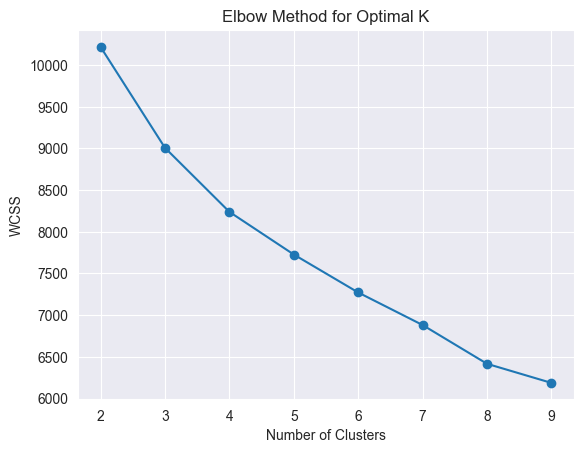

In [59]:
plt.plot(range(2, 10), wcss, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [60]:
kmeans = KMeans(n_clusters=4)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [61]:
df["Cluster"].value_counts()

Cluster
1    584
0    580
2    543
3    509
Name: count, dtype: int64

In [62]:
cluster_summary = df.groupby(["Cluster"])[features].mean().round(2)
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,52.17,34358.16,118.58,2.21,3.32,6.56,24.88
1,56.95,77190.97,1270.84,4.41,8.40,2.42,51.78
2,55.90,36861.19,137.13,2.43,3.51,6.35,75.21
3,60.16,60426.37,903.48,7.61,8.09,6.14,45.39


In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0], pca_data[:,1]

pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

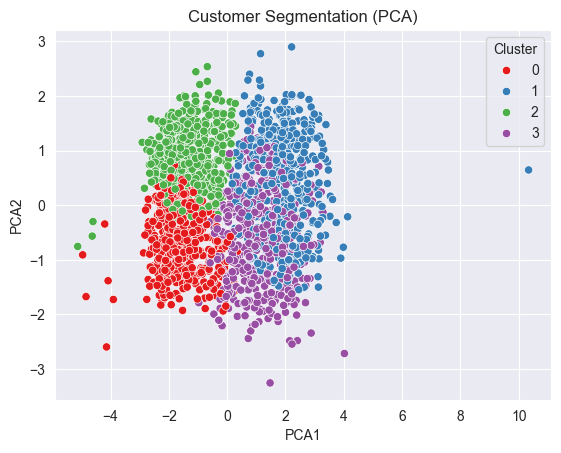

In [64]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title("Customer Segmentation (PCA)")
plt.show()

In [65]:
import joblib

joblib.dump(kmeans, "models/kmeans_model.pkl")
joblib.dump(scaler, "scalers/scaler.pkl")

['scalers/scaler.pkl']

In [66]:
cluster_summary.to_csv("data/cluster_summary.csv", index=True)